# California House Price Prediction using Linear Regression and RandomForest


In this notebook, I will analyze the California Housing dataset and build a predictive model with Linear Regression and Random Forest to estimate house prices.

I will start by importing the necessary libraries for data manipulation, visualization, and modeling.

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I've loaded the dataset using pandas. This dataset has various features of houses in California, which I'll use to predict house prices.

In [151]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Exploratory Data Analysis (EDA)

Using data.info(), I'll check the structure (such as the number of entries, data types, and missing values) of the dataset.


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Using data.dropna(inplace=True) to remove rows with missing values.

In [153]:
data.dropna(inplace=True)

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Using train_test_split, to partition the dataset into features  and the target variable, excluding 'median_house_value'.







In [155]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

Utilizing train_test_split, to split the dataset into training and testing sets, allocating 20% of the data for testing

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Merging the features (X_train) and the target variable (y_train) to create the training dataset.

In [157]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15910,-122.42,37.74,52.0,1271.0,353.0,1076.0,324.0,2.9911,NEAR BAY,263900.0
4345,-118.37,34.12,34.0,2821.0,399.0,843.0,391.0,11.6150,<1H OCEAN,500001.0
5857,-118.33,34.19,45.0,1505.0,347.0,799.0,319.0,3.1380,<1H OCEAN,217000.0
1556,-121.96,37.81,12.0,6488.0,778.0,2404.0,765.0,8.3188,<1H OCEAN,403400.0
16310,-121.33,38.01,27.0,1612.0,234.0,630.0,255.0,5.3180,INLAND,155100.0
...,...,...,...,...,...,...,...,...,...,...
14580,-117.19,32.82,35.0,1074.0,180.0,442.0,173.0,5.2530,NEAR OCEAN,204000.0
3830,-118.46,34.19,35.0,1491.0,295.0,779.0,309.0,6.1142,<1H OCEAN,256300.0
13879,-117.38,34.44,4.0,5083.0,867.0,2541.0,856.0,4.2414,INLAND,121400.0
10513,-117.70,33.51,2.0,5261.0,763.0,1460.0,599.0,6.8279,<1H OCEAN,279000.0


Creating a scatter plot to visualize the relationship between latitude, longitude, and house prices ('median_house_value'). This helps to explore geographical patterns in the dataset.

<Axes: xlabel='latitude', ylabel='longitude'>

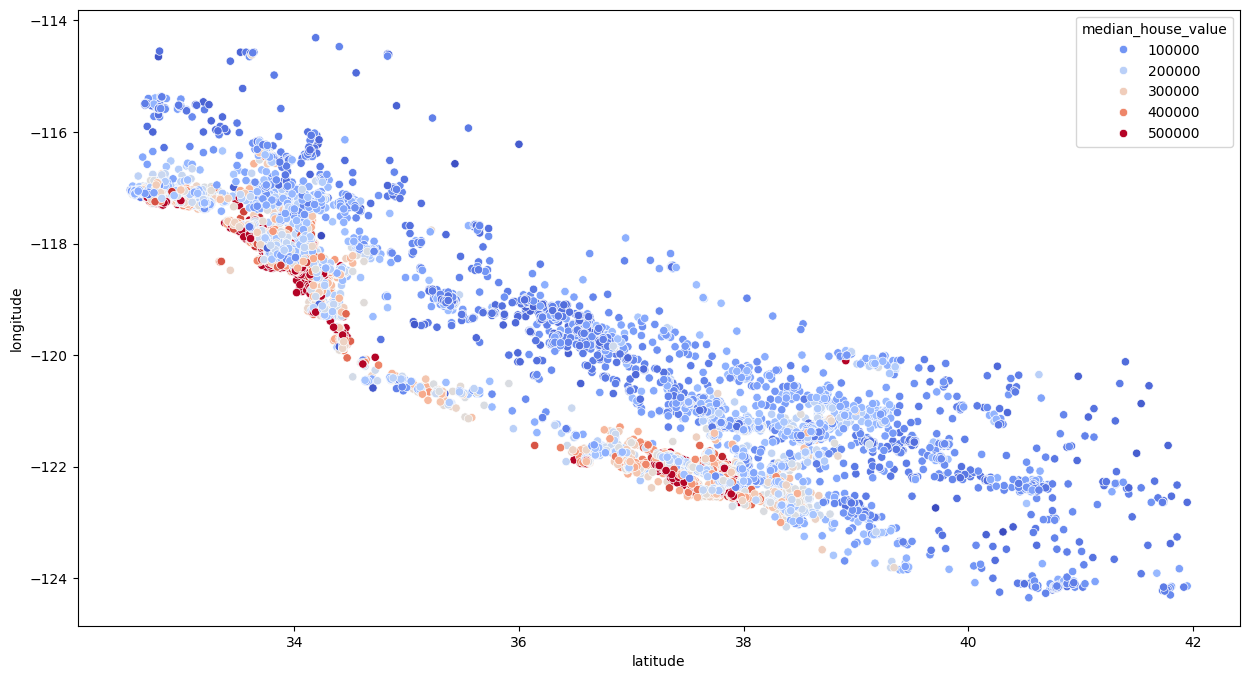

In [158]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

## Data Preprocessing

Using train_data.hist() to visualize the distribution of each feature in the training data / dataset

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

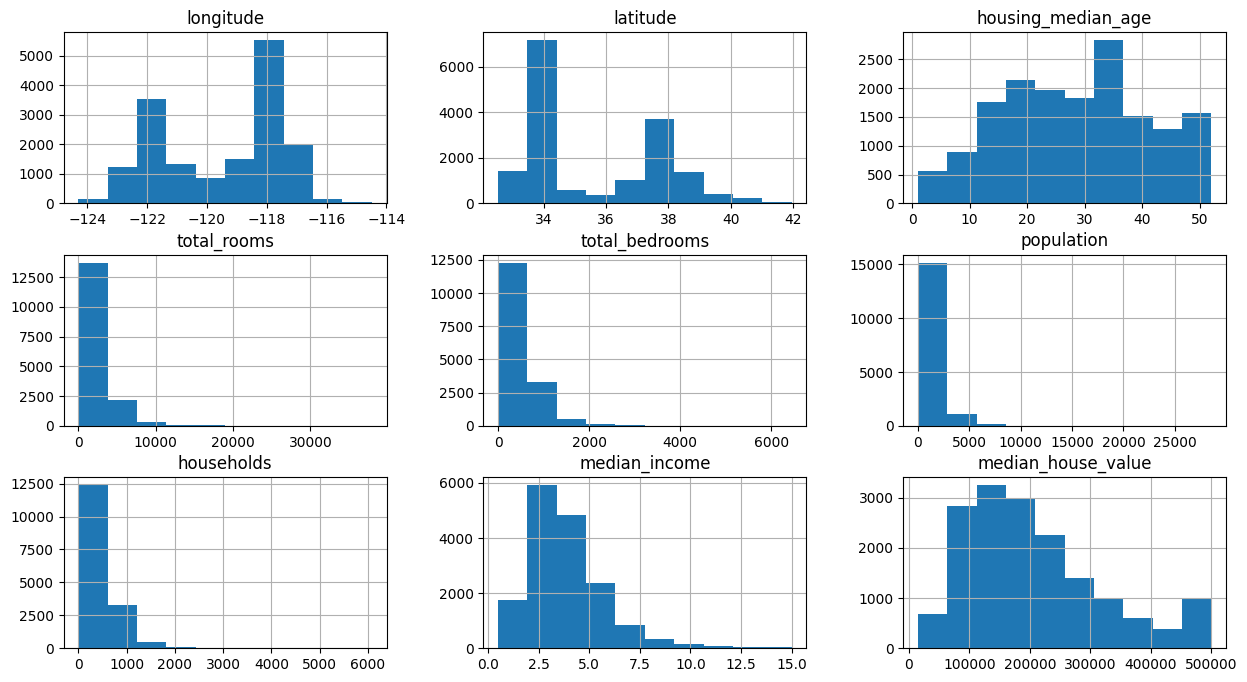

In [ ]:
train_data.hist(figsize=(15,8))

As shown in the figure,features such as 'households', 'total_rooms', 'total_bedrooms', and 'population', are right-skewed. To normalize their distributions, I apply a log transformation.


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

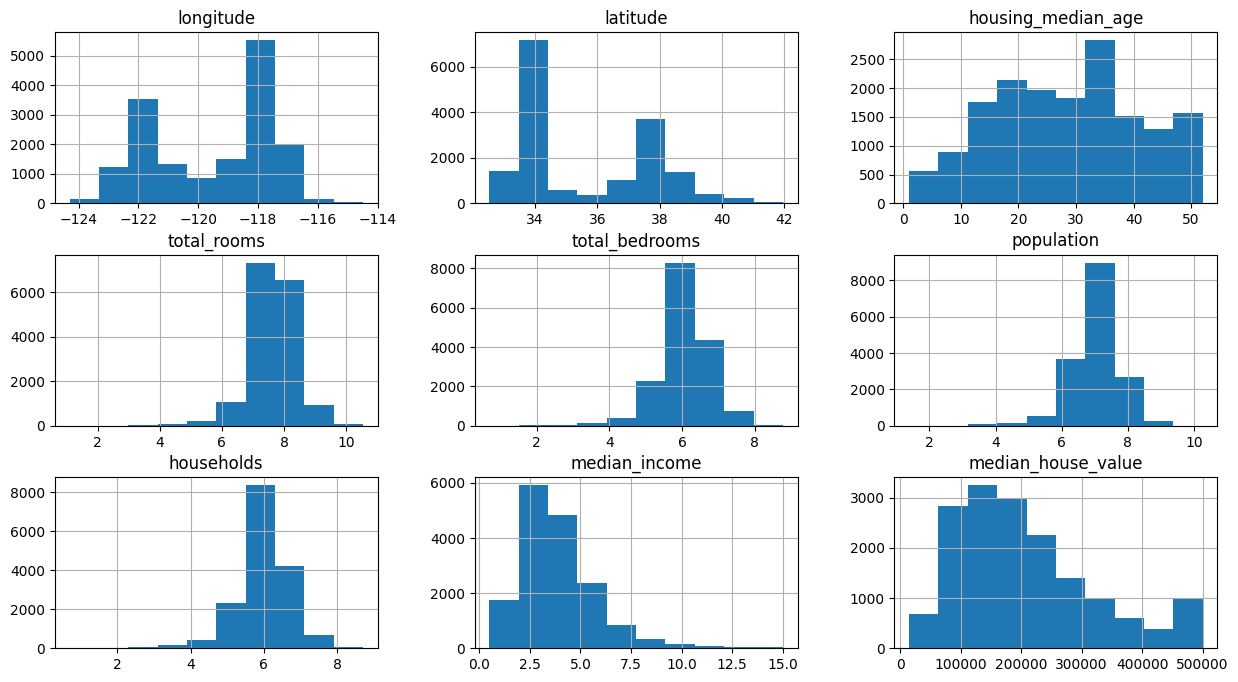

In [ ]:
train_data['households'] = np.log(train_data['households'] + 1)
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)

train_data.hist(figsize=(15, 8))

The 'ocean_proximity' feature is categorical. First, I check its value counts with. Then, I apply one-hot encoding using pd.get_dummies() to convert this categorical feature into numerical format, facilitating its use in the model.

In [ ]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7275
INLAND        5160
NEAR OCEAN    2105
NEAR BAY      1804
ISLAND           2
Name: count, dtype: int64

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis =1) #encoding

After converting all categorical features to numeric values, I use a heatmap to analyze the correlation between different features. This helps to identify which features are strongly correlated with each other and with the target variable.



<Axes: >

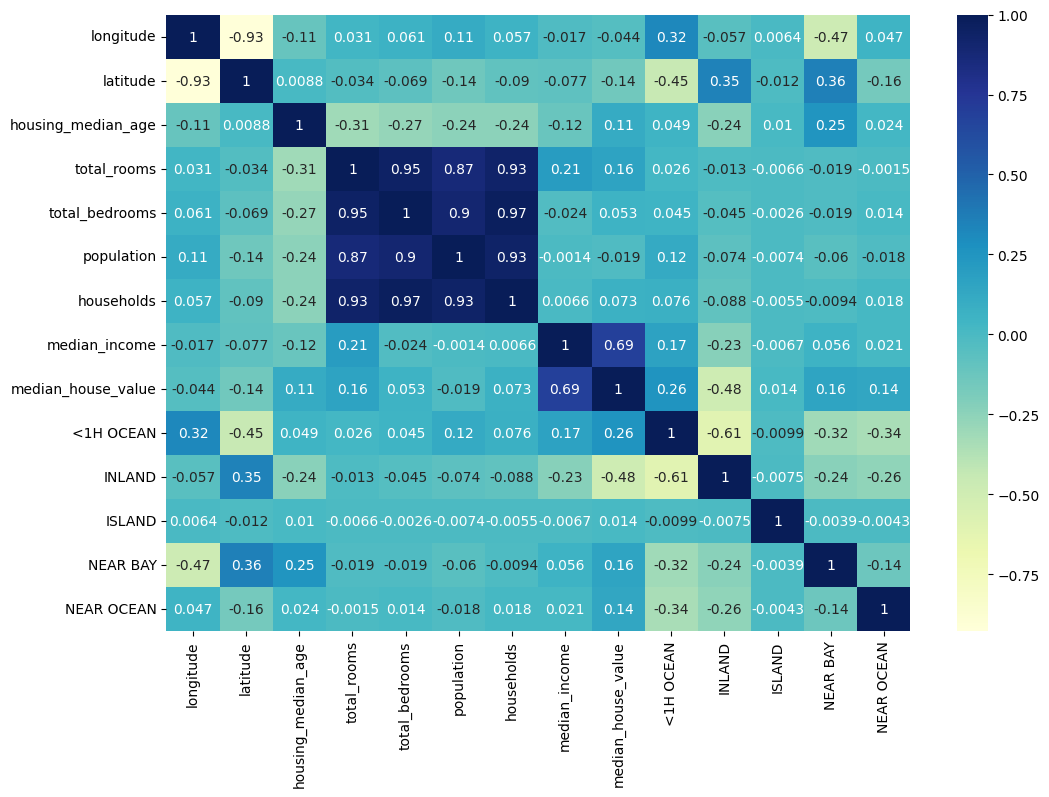

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot = True, cmap="YlGnBu")

## Linear Regression Model

Firstly, I start by training a Linear Regression model using the features in the training dataset to predict house prices.

In [ ]:
from sklearn.linear_model import LinearRegression
X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

I repeat the preprocessing steps on the test data to ensure it matches the format of the training data. This includes log transforming the skewed features and applying one-hot encoding to the 'ocean_proximity' feature.

In [ ]:
test_data = X_test.join(y_test)

test_data['households'] = np.log(test_data['households'] + 1)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis =1)

In [ ]:
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

Evaluating the performance of linear regression model on the test set using the score method, which returns the coefficient of determination (R² score). This metric indicates how well the model's predictions match the actual values.

R² score of 0.671 suggests that approximately 67.1% of the variance in the target variable (median house value) can be explained by the features in linear regression model.

In [ ]:
reg.score(X_test, y_test)

0.6710937775672561

## Random Forest Model

Now, I train Random Forest regressor on the train set and evaluate its performance on test set.



The score obtained is 0.81, indicating that the RandomForestRegressor model explains approximately 81% of the variance in the target variable (median house value).This is significantly higher that Linear regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.8183060235478056

### Random Forest Hyperparameter Tuning

Using GridSearchCV from to tune hyperparameters for the RandomForestRegressor model. The grid search explores different combinations of hyperparameters, such as the n_estimators, min_samples_split, and max_depth, to find the best performing model. However, the grid search / the tuning process doesn't show an improved score on the test data.

In [ ]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()

param_grid = {

              "n_estimators": [100, 200, 300],
              "min_samples_split": [2,4],
              "max_depth": [None, 4, 8]

}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring = "neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

In [ ]:
grid_search.best_estimator_.score(X_test, y_test)

0.8192574307162511